# Confusion Matrix for Spacy NER

In [1]:
# TODO: point to your Model
import spacy
nlp = spacy.load("sv_pipeline")

In [2]:
from spacy.training import offsets_to_biluo_tags


def get_cleaned_label(label: str):
    if "-" in label:
        return label.split("-")[1]
    else:
        return label

    
def create_target_vector(doc):
    return [get_cleaned_label(label[2]) for label in doc[1]["entities"]]


def create_total_target_vector(docs):
    target_vector = []
    for doc in docs:
        target_vector.extend(create_target_vector(doc))
    return target_vector


def create_prediction_vector(text):
    return [get_cleaned_label(prediction) for prediction in get_all_ner_predictions(text)]

    
def create_total_prediction_vector(docs: list):
    prediction_vector = []
    for doc in docs:
        prediction_vector.extend(create_prediction_vector(doc[0]))
    return prediction_vector

def get_all_ner_predictions(text):
    doc = nlp(text)
    entities = [(e.start_char, e.end_char, e.label_) for e in doc.ents]
    bilou_entities = offsets_to_biluo_tags(doc, entities)
    return bilou_entities


* Sample Documents annotated for SpaCy NER

In [18]:
docs=[("Sigiriya also known as the Lion's Rock is a rock fortress and a palace located in the Matale district of Sri Lanka.",
 {
     'entities': [
           (0, 8, 'U-Attraction'),
           (9, 13, 'O'),
           (14, 19, 'O'),
           (20, 22, 'O'),
           (23, 26, 'O'),
           (27, 31, 'B-Attraction'),
           (31, 33, 'I-Attraction'),
           (34, 38, 'L-Attraction'),
           (39, 41, 'O'),
           (42, 43, 'O'),
           (44, 48, 'O'),
           (49, 57, 'O'),
           (58, 61, 'O'),
           (62, 63, 'O'),
           (64, 70, 'O'),
           (71, 78, 'O'),
           (79, 81, 'O'),
           (82, 85, 'O'),
           (86, 92, 'O'),
           (93, 101, 'O'),
           (102, 104, 'O'),
           (105, 108, 'B-Country'),
           (109, 114, 'L-Country'),
           (114, 115, 'O')
       ]
   }
)]

* Sample expected (target) values

In [27]:
import pandas as pd  

a= create_total_target_vector(docs)
len(a)
b = create_total_prediction_vector(docs)
len(b)

df = pd.DataFrame()

# df["gs"] = a
# df["nlp"] = b

print(a)
print(b)

['Attraction', 'O', 'O', 'O', 'O', 'Attraction', 'Attraction', 'Attraction', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'Country', 'Country', 'O']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'LOC', 'O']


* Sample prediction values

23

### Methods to get the labels 

In [6]:
def get_model_labels():
    labels = list(nlp.get_pipe("ner").labels)
    labels.append("O")
    return sorted(labels)

In [7]:
def get_dataset_labels():
    return sorted(set(create_total_target_vector(docs)))

In [13]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(docs): 
    classes = sorted(set(create_total_target_vector(docs)))
    y_true = create_total_target_vector(docs)
    y_pred = create_total_prediction_vector(docs)

    return confusion_matrix(y_true, y_pred, classes)

In [15]:
a = generate_confusion_matrix(docs)

ValueError: Found input variables with inconsistent numbers of samples: [24, 23]

### plot confusion matrix using matplotlib example
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [12]:
from matplotlib import pyplot
import numpy

def plot_confusion_matrix(docs, classes, normalize=False, cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    title = 'Confusion Matrix, for SpaCy NER'

    # Compute confusion matrix
    cm = generate_confusion_matrix(docs)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm, ax, pyplot

* Sample Confusion Matrix for above data

(array([[ 4,  0,  0],
        [ 0,  2,  0],
        [ 0,  0, 18]], dtype=int64),
 <module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\envs\\relation_ext\\lib\\site-packages\\matplotlib\\pyplot.py'>)

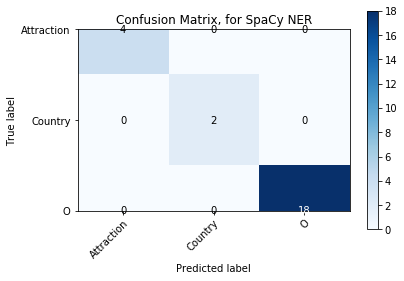

In [11]:
plot_confusion_matrix(docs,classes=get_dataset_labels(),normalize=False)